In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

In [3]:
print(data.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [4]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
data.shape

(30, 17)

In [6]:
X = data[['R','AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]
y = data['W']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [8]:
lr_model = LinearRegression()

In [9]:
lr_model.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test,lr_y_pred)

In [10]:
lr_r2 = r2_score(y_test,lr_y_pred)

In [11]:
lr_mae=mean_absolute_error(y_test, lr_y_pred)

In [12]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [13]:
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [14]:
best_rf_model = rf_grid_search.best_estimator_

In [15]:
rf_y_pred = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test,rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

In [16]:
print("Linear Regression - Mean Squared Error:", lr_mse)
print("Linear Regression - R^2 Score:", lr_r2)
print("Linear Regression - Mean Absolute Error:", lr_mae)
print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R^2 Score:", rf_r2)
print("Random Forest - Mean Absolute Error:", rf_mae)

Linear Regression - Mean Squared Error: 37.562341324215616
Linear Regression - R^2 Score: -0.19350775610923399
Linear Regression - Mean Absolute Error: 5.54077031874705
Random Forest - Mean Squared Error: 44.25448333333333
Random Forest - R^2 Score: -0.4061442188879083
Random Forest - Mean Absolute Error: 4.261666666666666


In [17]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted wins')

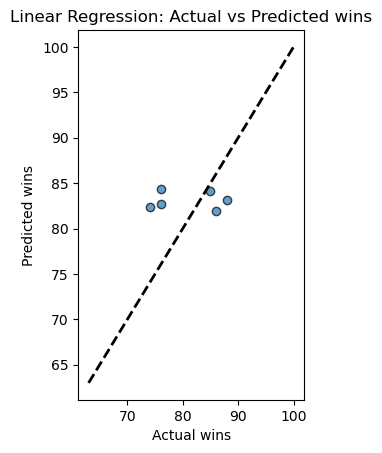

In [18]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(),y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.title('Linear Regression: Actual vs Predicted wins')

Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted wins')

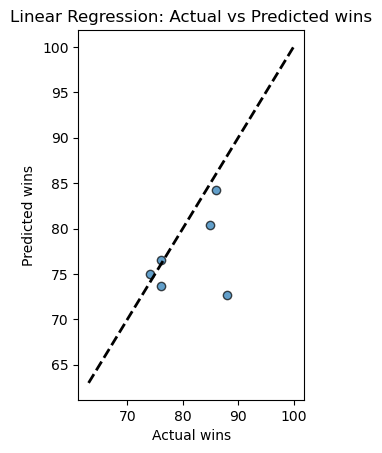

In [19]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(),y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.title('Linear Regression: Actual vs Predicted wins')

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [21]:
rf_feature_importances = pd.DataFrame(best_rf_model.feature_importances_, X.columns, columns=['Importance'])
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)
print(rf_feature_importances)

     Importance
RA     0.216726
ER     0.199667
SV     0.181815
ERA    0.169304
R      0.032756
AB     0.029415
BB     0.024071
E      0.024006
2B     0.022562
H      0.019432
SB     0.018151
SO     0.016714
HR     0.014454
3B     0.013549
SHO    0.010700
CG     0.006677


In [22]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Fetaure Importance for random forest Model')

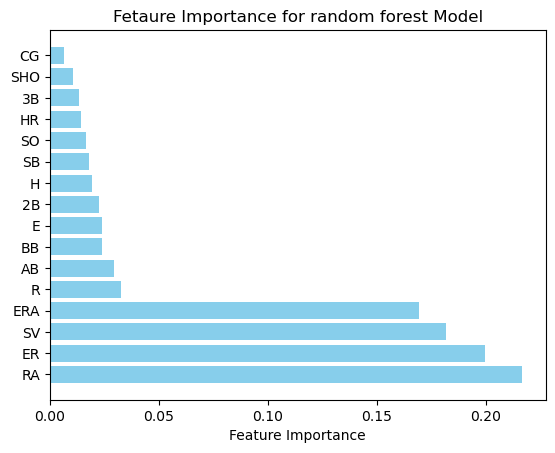

In [23]:
plt.barh(rf_feature_importances.index, rf_feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Fetaure Importance for random forest Model')

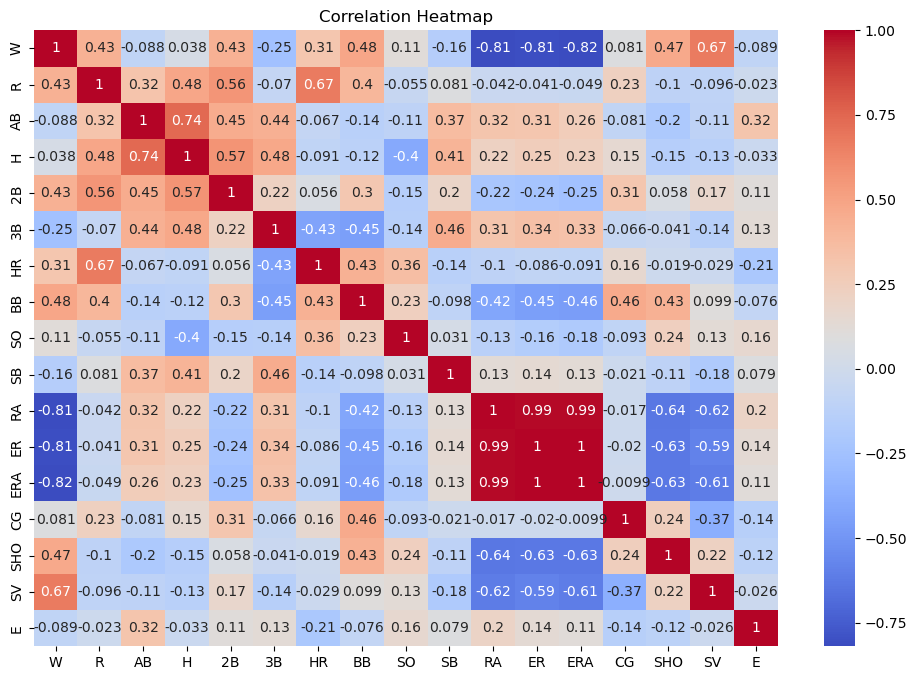

In [24]:
plt.figure(figsize=(12,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
new_data = pd.DataFrame({
    'R': [700, 750],
    'AB': [5500, 5700],
    'H': [1400, 1500],
    '2B': [300, 320],
    '3B': [30, 35],
    'HR': [150, 160],
    'BB': [500, 520],
    'SO': [1200, 1100],
    'SB': [100, 90],
    'RA': [600, 650],
    'ER': [500, 550],
    'ERA': [4.00, 4.50],
    'CG': [5, 6],
    'SHO': [3, 4],
    'SV': [40, 35],
    'E': [100, 90]
})

In [26]:
lr_predictions = lr_model.predict(new_data)
print('Linear Regression Predictions for new data:',lr_predictions)

Linear Regression Predictions for new data: [  1.55055458 -25.96188462]


In [27]:
rf_predictions = best_rf_model.predict(new_data)
print("Random Forest predictions for new data:",rf_predictions)

Random Forest predictions for new data: [87.79 82.38]


In [28]:
tolerance = 16
def calculate_accuracy(y_true, y_pred, tolerance):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

lr_accuracy = calculate_accuracy(y_test, lr_y_pred, tolerance)
rf_accuracy = calculate_accuracy(y_test, rf_y_pred, tolerance)
print('Linear Regression : Adjusted Accuracy',lr_accuracy)
print('Random Forest : Adjusted Accuracy',rf_accuracy)

Linear Regression : Adjusted Accuracy 1.0
Random Forest : Adjusted Accuracy 1.0
